<a href="https://colab.research.google.com/github/Harinijuluru/2303A52426-AIML/blob/main/Classification_dataset_AIML_LAB_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
get_ipython().run_line_magic('matplotlib', 'inline')


In [7]:
df=pd.read_csv("/content/Employee.csv")

In [ ]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [8]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [10]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


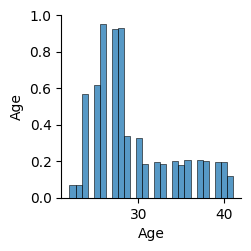

In [11]:
sns.pairplot(df.iloc[:,[2,4,5]])

In [12]:
df.iloc[:,-9]

,Education
0,Bachelors
1,Bachelors
2,Bachelors
3,Masters
4,Masters
...,...
4648,Bachelors
4649,Masters
4650,Masters
4651,Bachelors


In [13]:
df['Age'].min()

22

In [14]:
df['Age'].max()

41

In [15]:
df['Age'].mean()

29.393294648613796

In [16]:
df.dtypes

,0
Education,object
JoiningYear,int64
City,object
PaymentTier,int64
Age,int64
Gender,object
EverBenched,object
ExperienceInCurrentDomain,int64
LeaveOrNot,int64


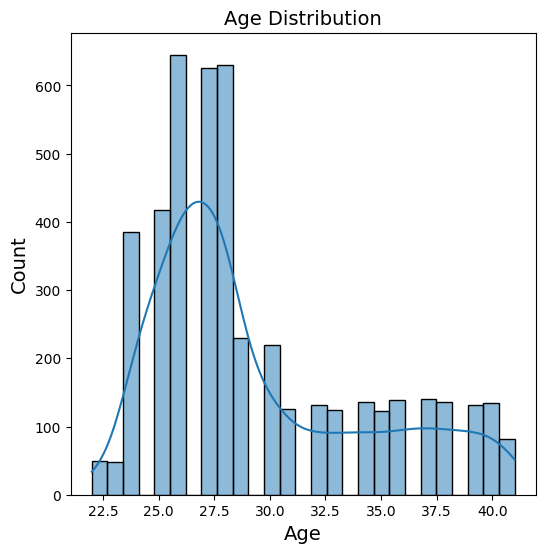

In [17]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution',fontsize=14)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.show()

In [18]:
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


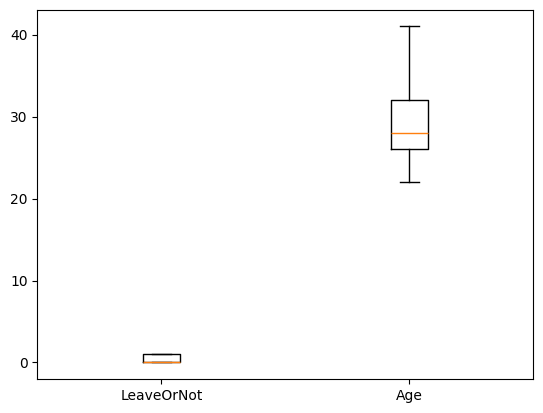

In [19]:
plt.boxplot(x=[df['LeaveOrNot'],df['Age']])
plt.xticks([1,2],['LeaveOrNot','Age'])
plt.show()

In [20]:
numImputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
numImputer= numImputer.fit(df[['Age', 'PaymentTier']])
new_serr=numImputer.transform(df[['Age', 'PaymentTier']])
new_serr

array([[34,  3],
       [28,  1],
       [38,  3],
       ...,
       [27,  3],
       [30,  3],
       [33,  3]])

In [21]:
catImputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
catImputer=catImputer.fit(df[['Education','EverBenched']])
new_serr=catImputer.transform(df[['Education','EverBenched']])
new_serr

array([['Bachelors', 'No'],
       ['Bachelors', 'No'],
       ['Bachelors', 'No'],
       ...,
       ['Masters', 'No'],
       ['Bachelors', 'Yes'],
       ['Bachelors', 'Yes']], dtype=object)

In [22]:
numImputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
numImputer= numImputer.fit(df[['Age', 'PaymentTier']])
df[['Age', 'PaymentTier']]=numImputer.transform(df[['Age', 'PaymentTier']])
catImputer= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
catImputer=catImputer.fit(df[['Education','EverBenched']])
df[['Education','EverBenched']]=catImputer.transform(df[['Education','EverBenched']])
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [23]:
df['Education'].value_counts()

,count
Education,
Bachelors,3601
Masters,873
PHD,179


In [24]:
df['Education']=df['Education'].replace(['Bachelors','Masters', 'PHD'],[0,1,2])

<ipython-input-24-f2efb78ec0b1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education']=df['Education'].replace(['Bachelors','Masters', 'PHD'],[0,1,2])


In [25]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,Bangalore,3,34,Male,No,0,0
1,0,2013,Pune,1,28,Female,No,3,1
2,0,2014,New Delhi,3,38,Female,No,2,0
3,1,2016,Bangalore,3,27,Male,No,5,1
4,1,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,Bangalore,3,26,Female,No,4,0
4649,1,2013,Pune,2,37,Male,No,2,1
4650,1,2018,New Delhi,3,27,Male,No,5,1
4651,0,2012,Bangalore,3,30,Male,Yes,2,0


In [26]:
df['City'].value_counts()

,count
City,
Bangalore,2228
Pune,1268
New Delhi,1157


In [27]:
df['City']=df['City'].replace(['Bangalore','Pune','New Delhi'],[0,1,2])

<ipython-input-27-68f070ffc4e0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['City']=df['City'].replace(['Bangalore','Pune','New Delhi'],[0,1,2])


In [28]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,Male,No,0,0
1,0,2013,1,1,28,Female,No,3,1
2,0,2014,2,3,38,Female,No,2,0
3,1,2016,0,3,27,Male,No,5,1
4,1,2017,1,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,Female,No,4,0
4649,1,2013,1,2,37,Male,No,2,1
4650,1,2018,2,3,27,Male,No,5,1
4651,0,2012,0,3,30,Male,Yes,2,0


In [29]:
df['Gender']=df['Gender'].replace(['Female','Male'],[1,2])

<ipython-input-29-57927df6b9fb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace(['Female','Male'],[1,2])


In [30]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,2,No,0,0
1,0,2013,1,1,28,1,No,3,1
2,0,2014,2,3,38,1,No,2,0
3,1,2016,0,3,27,2,No,5,1
4,1,2017,1,3,24,2,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,1,No,4,0
4649,1,2013,1,2,37,2,No,2,1
4650,1,2018,2,3,27,2,No,5,1
4651,0,2012,0,3,30,2,Yes,2,0


In [32]:
df['EverBenched']=df['Gender'].replace(['Female','Male'],[1,2])

In [33]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,2,2,0,0
1,0,2013,1,1,28,1,1,3,1
2,0,2014,2,3,38,1,1,2,0
3,1,2016,0,3,27,2,2,5,1
4,1,2017,1,3,24,2,2,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,1,1,4,0
4649,1,2013,1,2,37,2,2,2,1
4650,1,2018,2,3,27,2,2,5,1
4651,0,2012,0,3,30,2,2,2,0


In [35]:
from sklearn import preprocessing
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=20)
print(X_train.shape,X_test.shape)

(3722, 8) (931, 8)


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)


In [38]:
from sklearn.feature_selection import VarianceThreshold

variance_selector= VarianceThreshold(threshold=0)

X_train_fselection = variance_selector.fit_transform(X_train)
X_test_fselection = variance_selector.transform(X_test)

print(f"{X_train.shape[1]-X_train_fselection.shape[1]} features have been removed, {X_train_fselection.shape[1]} feature remain")


0 features have been removed, 8 feature remain


In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)


KNeighborsClassifier(n_neighbors=4)

In [40]:
y_pred=classifier.predict(X_test_s)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 

In [41]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print ('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('classification Report:\n')
print(result)

accuracy:0.83


Confusion Matrix:
[[567  31]
 [131 202]] 


-------------------------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       598
           1       0.87      0.61      0.71       333

    accuracy                           0.83       931
   macro avg       0.84      0.78      0.79       931
weighted avg       0.83      0.83      0.82       931



In [43]:
for i in range(1,11):
  classifier=KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
  classifier.fit(X_train_s, y_train)
  y_pred=classifier.predict(X_test_s)
  acc=metrics.accuracy_score(y_test, y_pred)
  print ('accuracy:%.2f\n\n'%(acc))






accuracy:0.80


accuracy:0.81


accuracy:0.80


accuracy:0.83


accuracy:0.82


accuracy:0.83


accuracy:0.82


accuracy:0.82


accuracy:0.83


accuracy:0.82




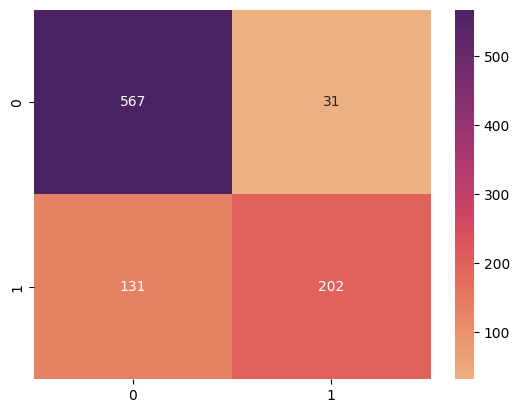

In [44]:
ax= sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

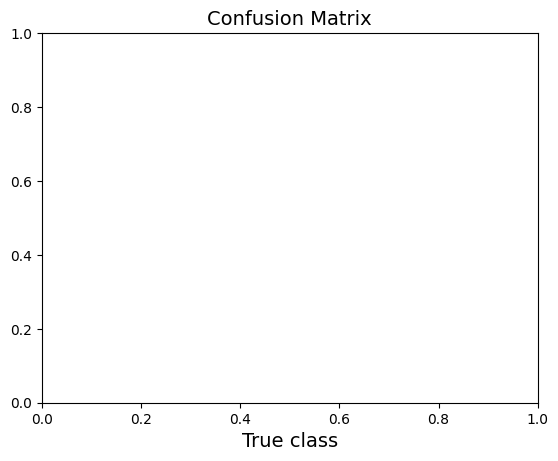

In [46]:
plt.xlabel("predicted class", fontsize=14)
plt.xlabel("True class", fontsize=14)
plt.title("Confusion Matrix", fontsize=14)
plt.show()


In [47]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeclassifier=DecisionTreeClassifier(criterion= 'entropy', random_state=100)
DecisionTreeclassifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=100)

In [48]:
y_Dtpred=DecisionTreeclassifier.predict(X_test_s)
print(y_Dtpred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 

In [49]:
y_Dtpred=classifier.predict(X_test_s)
print(y_Dtpred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 0 0 0 0 

In [50]:
from sklearn import metrics
accuracy=metrics.accuracy_score(y_test, y_Dtpred)
print ('accuracy:%.2f\n\n'%(accuracy))
CM=metrics.confusion_matrix(y_test, y_Dtpred)
print('Confusion Matrix:')
print(CM,'\n\n')
print('-------------------------------------------------------')
result=metrics.classification_report(y_test,y_Dtpred)
print('classification Report:\n')
print(result)

accuracy:0.82


Confusion Matrix:
[[571  27]
 [136 197]] 


-------------------------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.81      0.95      0.88       598
           1       0.88      0.59      0.71       333

    accuracy                           0.82       931
   macro avg       0.84      0.77      0.79       931
weighted avg       0.83      0.82      0.82       931



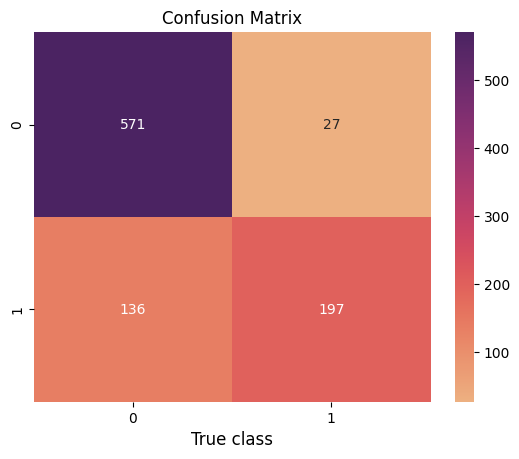

In [51]:
Image= sns.heatmap(CM, cmap='flare',annot=True, fmt='d')

plt.xlabel("predicted class", fontsize=12)
plt.xlabel("True class", fontsize=12)
plt.title("Confusion Matrix", fontsize=12)

plt.show()